In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from fill_NaNval import Filler 
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
Data1 = pd.read_csv("prof_data.csv")
Data1.head()

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ppg_filler = Filler()
Data1 = ppg_filler.fill_all_Id(Data1, deg_ppg= 3, deg_hr= 6, deg_hrIbi= 2)

filling the missing values of ppg with a 3 degree polynomial
done
filling the missing values of hr with a 6 degree polynomial
done
filling the missing values of hrIbi with a 2 degree polynomial
done


In [4]:
Data1

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context,ppg_filled,hr_filled,hrIbi_filled
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.917829e+06,68.000676,719.860534
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.917495e+06,67.998497,719.864523
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.917365e+06,67.996474,719.868227
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.918146e+06,67.994452,719.871931
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.919319e+06,67.992326,719.875824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8824673,48,4225425,NaN,NaN,NaN,NaN,0.0,0.0,-10.0,0.0,NaN,NaN,NaN,NaN,2.376058e+06,0.000000,0.000000
8824674,48,4225455,-808.0,42.0,4038.0,3349663.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.349663e+06,6.083595,480.817765
8824675,48,4225495,-792.0,-89.0,3885.0,3404833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.404833e+06,6.071127,480.816701
8824676,48,4225535,-806.0,-78.0,4130.0,3316474.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.316474e+06,6.058658,480.815636


In [5]:
clean_data = ppg_filler.fill_hrStatus_val(Data1)
clean_data.tail()

filling the missing values og hr_satus with a logistic regression
The accuracy of our predictor is: 0.986658769526912


,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,affect,context,ppg_filled,hr_filled,hrIbi_filled,hr_status_imputed
8824672,48,4225415,-950.0,-146.0,3535.0,3360408.0,NaN,NaN,NaN,NaN,NaN,NaN,3360408.0,6.096061,480.818830,-10.0
8824674,48,4225455,-808.0,42.0,4038.0,3349663.0,NaN,NaN,NaN,NaN,NaN,NaN,3349663.0,6.083595,480.817765,-10.0
8824675,48,4225495,-792.0,-89.0,3885.0,3404833.0,NaN,NaN,NaN,NaN,NaN,NaN,3404833.0,6.071127,480.816701,-10.0
8824676,48,4225535,-806.0,-78.0,4130.0,3316474.0,NaN,NaN,NaN,NaN,NaN,NaN,3316474.0,6.058658,480.815636,-10.0
8824677,48,4225576,-823.0,-124.0,3964.0,3314477.0,NaN,NaN,NaN,NaN,NaN,NaN,3314477.0,6.045875,480.814545,-10.0


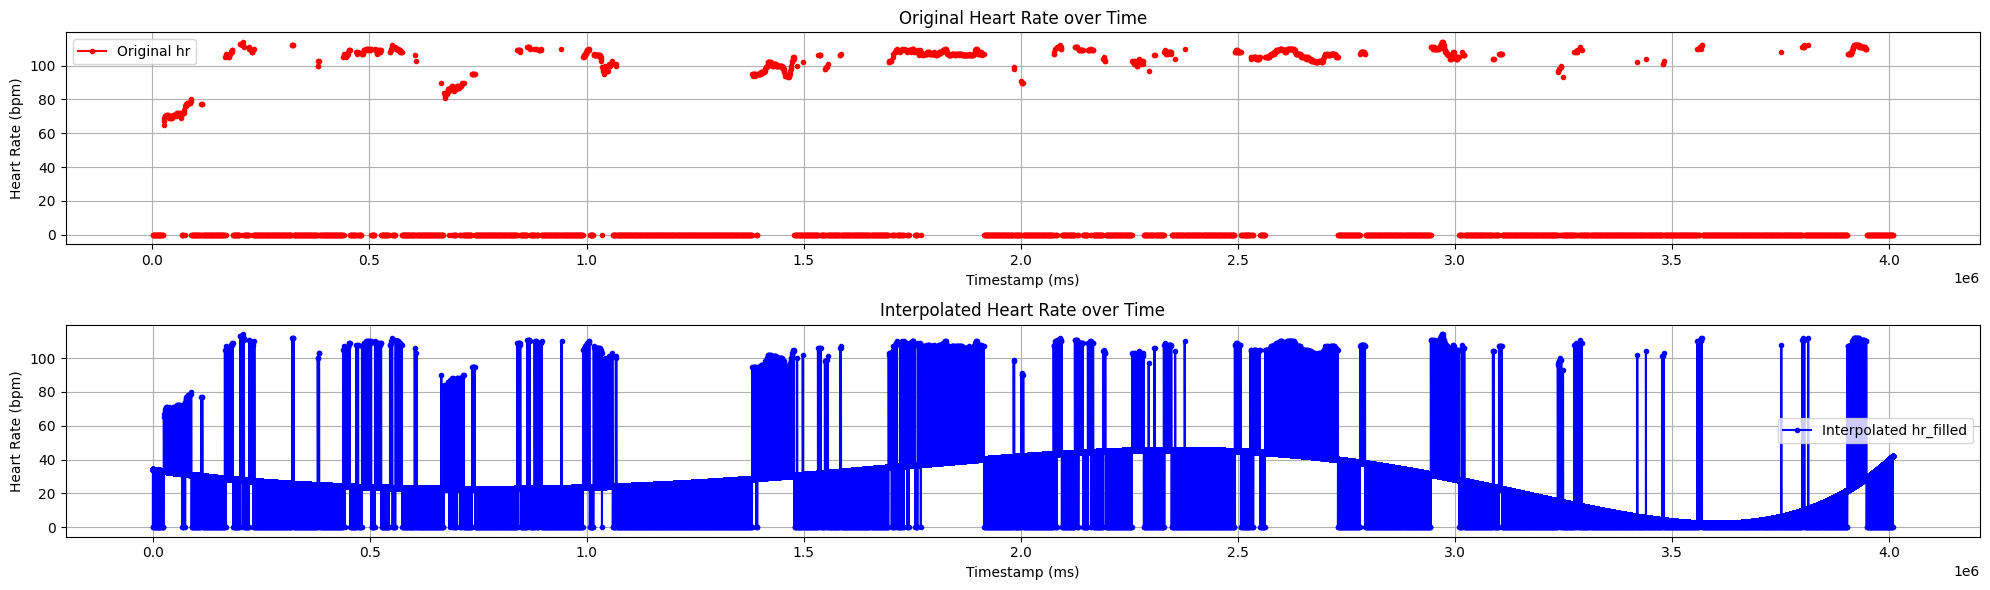

In [6]:
#hr value test.
df =  Data1[Data1['sessionId'] == 15]

plt.figure(figsize=(20, 6))
plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['hr'], marker='.', linestyle='-', color='red', label='Original hr')
plt.title('Original Heart Rate over Time')
plt.xlabel('Timestamp (ms)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.legend()

# Create the second subplot for the interpolated 'ppg_filled'
plt.subplot(2, 1, 2)
plt.plot(df['timestamp'], df['hr_filled'], marker='.', linestyle='-', color='blue', label='Interpolated hr_filled')
plt.title('Interpolated Heart Rate over Time')
plt.xlabel('Timestamp (ms)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame containing 'hr' and 'hr_status' columns
# Map numeric values to classes
class_mapping = {1.0: 'Class1', -10.0: 'Class2', 0.0: 'Class3', -3.0: 'Class4',
                 -99.0: 'Class5', -999.0: 'Class6', -1.0: 'Class7', -11.0: 'Class8'}

# Replace numeric values with corresponding classes
df['hr_status_class'] = df['hrStatus'].map(class_mapping)

# Split data into complete and incomplete observations
complete_data = df.dropna(subset=['hr_filled', 'hr_status_class'])
incomplete_data = df[df['hr_status_class'].isna()]

# Prepare data for classification
X = complete_data[['hr_filled']]
y = complete_data['hr_status_class']

# Train logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict missing 'hr_status' values
incomplete_data['hr_status_class_imputed'] = model.predict(incomplete_data[['hr_filled']])

# Map predicted classes back to numeric values
class_mapping_reverse = {v: k for k, v in class_mapping.items()}
incomplete_data['hr_status_imputed'] = incomplete_data['hr_status_class_imputed'].map(class_mapping_reverse)


# Compute accuracy of the predictor
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the predictor:", accuracy)

merged = pd.concat([complete_data, incomplete_data])
merged.drop(["hr_status_class","hr_status_class_imputed","notification","engagement"],axis=1,inplace=True)
merged['hr_status_imputed'] = merged['hr_status_imputed'].fillna(merged['hrStatus'])
merged

# Check imputed data
df.head()

Accuracy of the predictor: 0.986658769526912


,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context,ppg_filled,hr_filled,hr_status_class
0,1,8,653.0,195.0,4324.0,1917829.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917829.0,68.000676,NaN
1,1,50,659.0,198.0,4096.0,1917495.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917495.0,67.998497,NaN
2,1,89,645.0,149.0,4054.0,1917365.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1917365.0,67.996474,NaN
3,1,128,752.0,213.0,4090.0,1918146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1918146.0,67.994452,NaN
4,1,169,652.0,232.0,4088.0,1919319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1919319.0,67.992326,NaN


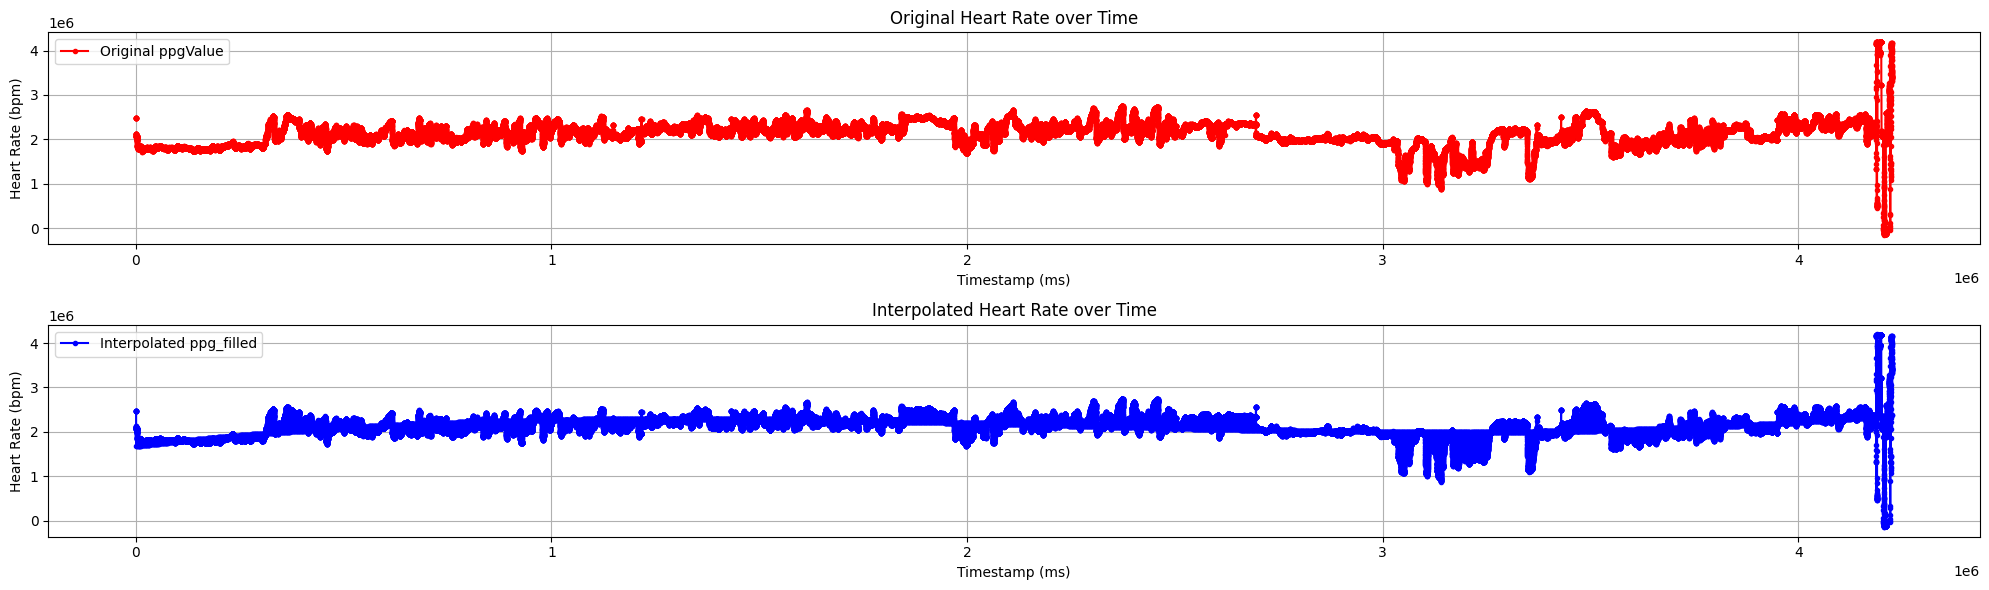

In [322]:
#PPGvalue test.
df =  Data1[Data1['sessionId'] == 8]

plt.figure(figsize=(20, 6))
plt.subplot(2, 1, 1)
plt.plot(df['timestamp'], df['ppgValue'], marker='.', linestyle='-', color='red', label='Original ppgValue')
plt.title('Original Heart Rate over Time')
plt.xlabel('Timestamp (ms)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.legend()

# Create the second subplot for the interpolated 'ppg_filled'
plt.subplot(2, 1, 2)
plt.plot(df['timestamp'], df['ppg_filled'], marker='.', linestyle='-', color='blue', label='Interpolated ppg_filled')
plt.title('Interpolated Heart Rate over Time')
plt.xlabel('Timestamp (ms)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


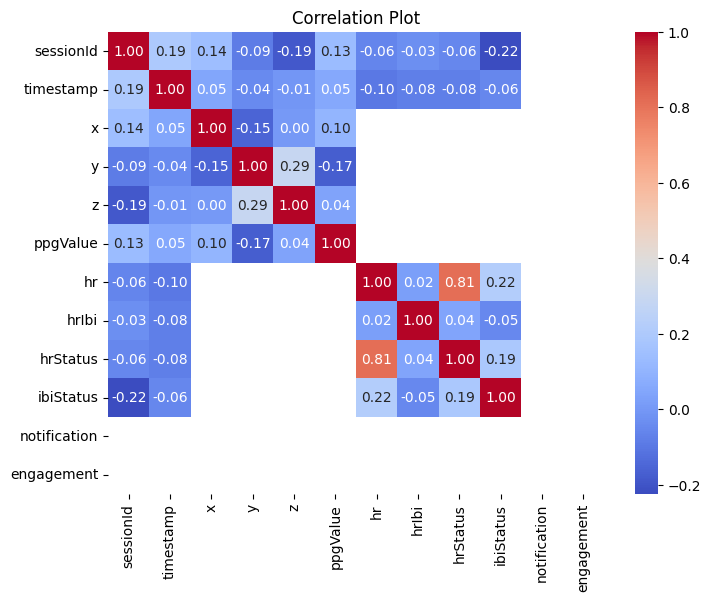

In [126]:
import seaborn as sns
correlation_matrix = Data1.drop(Data1.columns[-2:], axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot')
plt.show()

In [75]:
len(Data1)

8824678

In [57]:
context = Data1["engagement"].notna()
Data1["engagement"][context].unique()

array([1.])

In [36]:
affect = Data1["affect"].notna()
Data1["affect"][affect].unique()

array(['RELAXED', 'HAPPY', 'ANGRY', 'SAD'], dtype=object)

In [37]:
Data1["sessionId"].unique()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 14, 15, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 49, 50, 51, 53, 54, 55, 56, 57, 58, 30, 11, 16,
       28, 48])

In [11]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8824678 entries, 0 to 8824677
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   sessionId     int64  
 1   timestamp     int64  
 2   x             float64
 3   y             float64
 4   z             float64
 5   ppgValue      float64
 6   hr            float64
 7   hrIbi         float64
 8   hrStatus      float64
 9   ibiStatus     float64
 10  notification  float64
 11  engagement    float64
 12  affect        object 
 13  context       object 
dtypes: float64(10), int64(2), object(2)
memory usage: 942.6+ MB


In [50]:
Data1.dropna(inplace=False)

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context


In [129]:
data = Data1[Data1['ppgValue'].notna() & Data1['hr'].notna()]
data

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context


In [84]:
data[data["x"].notna()]

,sessionId,timestamp,x,y,z,ppgValue,hr,hrIbi,hrStatus,ibiStatus,notification,engagement,affect,context


In [77]:
data["affect"].unique()

array(['RELAXED', nan, 'HAPPY', 'ANGRY', 'SAD'], dtype=object)

In [46]:
data["sessionId"].unique()

array([ 1,  2,  3,  4,  6,  7,  8,  9, 10, 14, 15, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 49, 50, 51, 53, 54, 55, 56, 57, 58])

In [67]:
Data2 = pd.read_csv("SessionData-all.csv")
Data2.head()

,id,duration,watchId,age,gender,fairNumber
0,1,8021351,0Q3V,18-25,female,1
1,2,3752526,0Q3V,26-30,male,1
2,3,3989497,0QED,18-25,male,1
3,4,4979198,0QED,18-25,male,1
4,5,4836199,0QVM,18-25,male,1


In [69]:
Data2["id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58])

In [39]:
Data2["id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58])

In [70]:
Data3 = pd.read_csv("prof_skeleton.csv")
Data3.head()

,sessionId,timestamp,affect,context
0,1,1652042,True,False
1,1,1658301,False,True
2,1,5914412,True,False
3,1,5921368,False,True
4,2,629724,True,False


In [76]:
len(Data3)

261

In [74]:
Data3["sessionId"].unique()

array([ 1,  2,  3,  4,  6,  8,  9, 10, 14, 15, 17, 19, 20, 21, 22, 23, 24,
       25, 26, 27, 29, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 49, 50, 51, 53, 54, 55, 56, 57, 58, 30, 11, 16, 28, 48])